# Lab2:  Linear Classfication and Stochastic Gradient Descent

## Step1: Import and devide dataset.

In [211]:
from numpy import *
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

train_features, train_targets = load_svmlight_file("a9a", n_features=123)
test_features, test_targets = load_svmlight_file("a9a.t", n_features=123)

train_targets =  train_targets.reshape(train_targets.shape[0],1)
test_targets =  test_targets.reshape(test_targets.shape[0],1)

shape(train_features)

(32561, 123)

## Step2: Initialize SVM model parameters

In [212]:
import numpy as np

m, n = np.shape(train_features)

theta = np.ones((n, 1))
maxIteration = 300
c = 0.5
learning_rate = 0.01


## Step3: Stochastic gradient function, loss funciton and accuracy function

In [213]:
def cal_stochastic_gradient(theta):
    index =  (1 - train_targets * (train_features * theta) < 0)
    y = train_targets.copy()
    y[index] = 0
    randomNum = np.random.randint(0,train_features.shape[0])
    epsilon_gradient = - ((train_features)[randomNum].T * y[randomNum]).reshape(123,1)
    gradient = theta +  epsilon_gradient
    return gradient

def cal_hinge_loss(theta,x,y):
    epsilon_loss = 1 - y * x.dot(theta)
    epsilon_loss[epsilon_loss<0] = 0
    loss = 0.5 * np.dot(theta.transpose(), theta).sum() + epsilon_loss.sum()
    return loss/x.shape[0]
    
def cal_accur(x,y,theta):
    hypothesis = x * theta
    hypothesis[hypothesis > 0] = 1
    hypothesis[hypothesis <= 0] = -1
    return np.count_nonzero(hypothesis == y)/ x.shape[0]

## Step4: Gradient descent

In [214]:
train_loss, evaluation_loss, train_accr, evaluation_accr = [],[],[],[]

def gradientDescent(w):
    for i in range(maxIteration):
        gradient = cal_stochastic_gradient(w)
        w -= learning_rate*gradient
        
        train_loss.append(cal_hinge_loss(w,train_features,train_targets))
        evaluation_loss.append( cal_hinge_loss(w,test_features,test_targets))
        train_accr.append(cal_accur(train_features,train_targets,w))
        evaluation_accr.append(cal_accur(test_features,test_targets,w))
        
gradientDescent(theta)

The best accuracy for train set is  0.7692331316605755
The best accuracy for evaluation set is  0.774215343037897


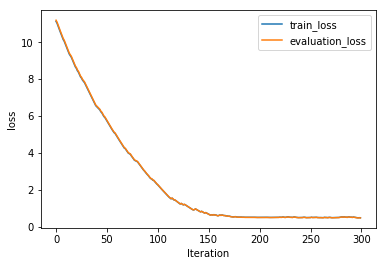

In [215]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot( train_loss, label="train_loss")
plt.plot( evaluation_loss,label="evaluation_loss" )
plt.legend(loc="upper right")


print("The best accuracy for train set is " ,max(train_accr))
print("The best accuracy for evaluation set is " ,max(evaluation_accr))

# Four  Optimized Methods of Gradient Descent

## 1. NAG

In [216]:
train_loss_nag,evaluation_loss_nag,train_accr_nag,evaluation_accr_nag = [],[],[],[]
theta = np.ones((n, 1))

def NAG(w):
    vt = 0
    gama = 0.9

    for i in range(maxIteration):
        gradient = cal_stochastic_gradient(w -gama*vt)
        vt = gama*vt + learning_rate * gradient
        w = w - vt
        
        train_loss_nag.append(cal_hinge_loss(w,train_features,train_targets))
        evaluation_loss_nag.append( cal_hinge_loss(w,test_features,test_targets))
        train_accr_nag.append(cal_accur(train_features,train_targets,w))
        evaluation_accr_nag.append(cal_accur(test_features,test_targets,w))
        
NAG(theta)

The best accuracy for train set is  0.8133656828721476
The best accuracy for evaluation set is  0.8163503470302806


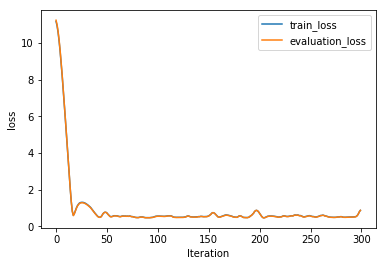

In [217]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_nag, label="train_loss")
plt.plot(evaluation_loss_nag,label="evaluation_loss" )
plt.legend(loc ='upper right')

print("The best accuracy for train set is " ,max(train_accr_nag))
print("The best accuracy for evaluation set is " ,max(evaluation_accr_nag))

 ## 2. RMSProp

In [218]:
train_loss_RMSProp,evaluation_loss_RMSProp,train_accr_RMSProp,evaluation_accr_RMSProp = [],[],[],[]
theta = np.ones((n, 1))

def RMSProp(w):
    gama = 0.9
    vt = 0
    Egt = 0
    e=0.00000001  
    
    learning_rate = 0.3

    for i in range(0, maxIteration):
        gradient = cal_stochastic_gradient(w - gama*vt)
        Egt = gama * Egt + ((1-gama)*(gradient**2)).sum()  
        w -= learning_rate*gradient/math.sqrt(Egt + e)  

        train_loss_RMSProp.append(cal_hinge_loss(w,train_features,train_targets))
        evaluation_loss_RMSProp.append( cal_hinge_loss(w,test_features,test_targets))
        train_accr_RMSProp.append(cal_accur(train_features,train_targets,w))
        evaluation_accr_RMSProp.append(cal_accur(test_features,test_targets,w))
        
RMSProp(theta)

The best accuracy for train set is  0.8122600657227972
The best accuracy for evaluation set is  0.8157975554327129


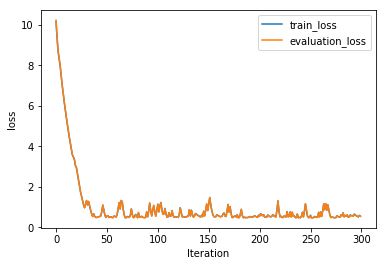

In [219]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_RMSProp, label="train_loss")
plt.plot(evaluation_loss_RMSProp,label="evaluation_loss" )
plt.legend(loc ='upper right')

print("The best accuracy for train set is " ,max(train_accr_RMSProp))
print("The best accuracy for evaluation set is " ,max(evaluation_accr_RMSProp))

## 3. AdaDelta

In [220]:
train_loss_adaDelta,evaluation_loss_adaDelta,train_accr_adaDelta,evaluation_accr_adaDelta = [],[],[],[]
theta = np.ones((n, 1))

def adaDelta(w):

    rho = 0.9
    Egt=0  
    Edt = 0  
    e=0.00000001  
    delta = 0  
    learning_rate = 2000

    for i in range(0, maxIteration):
        
        gradient = cal_stochastic_gradient(w)
        Egt = rho * Egt + ((1-rho)*(gradient**2) ).sum()  
        delta = - math.sqrt(Edt + e)*gradient/math.sqrt(Egt + e)
        Edt =rho*Edt+( (1-rho)*(delta**2) ).sum()  
        w = w + learning_rate*delta 
        
        train_loss_adaDelta.append(cal_hinge_loss(w,train_features,train_targets))
        evaluation_loss_adaDelta.append( cal_hinge_loss(w,test_features,test_targets))
        train_accr_adaDelta.append(cal_accur(train_features,train_targets,w))
        evaluation_accr_adaDelta.append(cal_accur(test_features,test_targets,w))
        
adaDelta(theta)

The best accuracy for train set is  0.8020331070913056
The best accuracy for evaluation set is  0.8036975615748418


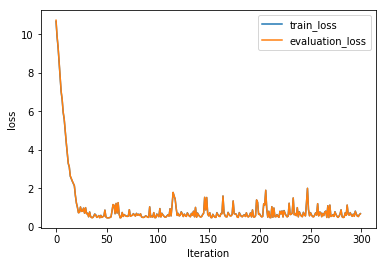

In [221]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_adaDelta, label="train_loss")
plt.plot(evaluation_loss_adaDelta,label="evaluation_loss" )
plt.legend(loc ='upper right')

print("The best accuracy for train set is " ,max(train_accr_adaDelta))
print("The best accuracy for evaluation set is " ,max(evaluation_accr_adaDelta))

## 4.Adam

In [222]:
train_loss_adam,evaluation_loss_adam,train_accr_adam,evaluation_accr_adam = [],[],[],[]
theta = np.ones((n, 1))

def adam(w):
 
    t = 0 
    m = 0  
    v = 0  
    b1 = 0.9  
    b2 = 0.995  
    learning_rate = 0.05
    
    for i in range(0, maxIteration):
        
        gradient = cal_stochastic_gradient(w)
        t +=1 
        m = b1*m + ((1-b1)*gradient).sum() 
        v = b2*v + ((1-b2)*(gradient**2)).sum()  
        mt = m/(1-(b1**t))  
        vt = v/(1-(b2**t)) 
        w = w- learning_rate * mt/(math.sqrt(vt)+e) 
        
        train_loss_adam.append(cal_hinge_loss(w,train_features,train_targets))
        evaluation_loss_adam.append( cal_hinge_loss(w,test_features,test_targets))
        train_accr_adam.append(cal_accur(train_features,train_targets,w))
        evaluation_accr_adam.append(cal_accur(test_features,test_targets,w))
        
adam(theta)

The best accuracy for train set is  0.7591904425539756
The best accuracy for evaluation set is  0.7637737239727289


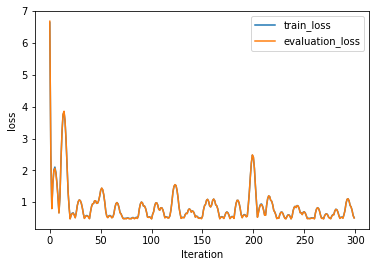

In [223]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_adam, label="train_loss")
plt.plot(evaluation_loss_adam,label="evaluation_loss" )
plt.legend(loc ='upper right')

print("The best accuracy for train set is " ,max(train_accr_adam))
print("The best accuracy for evaluation set is " ,max(evaluation_accr_adam))

# Graph of five different stochastic gradient descent methods

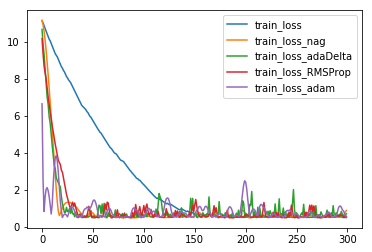

In [224]:
plt.plot(train_loss, label="train_loss")
plt.plot(train_loss_nag, label="train_loss_nag")
plt.plot(train_loss_adaDelta, label="train_loss_adaDelta")
plt.plot(train_loss_RMSProp, label ="train_loss_RMSProp")
plt.plot(train_loss_adam, label="train_loss_adam")
plt.legend(loc="upper right")